In [175]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [176]:
df = pd.read_csv("funda-2018-02-10.csv")

def clean_number(p):
    p = str(p)
    p = p.replace("€ ", "")
    p = p.replace(" k.k.", "")
    p = p.replace(" v.o.n.", "")
    p = p.replace(" (auction)", "")
    p = p.replace(",", "")
    if (re.findall('Price on request', p)):
        return None
    return float(p)

df = df.drop(columns=['plot_size'])
df['price'] = [ clean_number(p) for p in df['price'] ]
df['price'] /= 1000
df['living_area'] = [ clean_number(p) for p in df['living_area'] ]
df = df.dropna()
print("Total", len(df))
df.head()

Total 2662


,address,living_area,price,rooms,url
0,Oterleekstraat 15 1023 ED Amsterdam,63.0,319.0,4.0,https://www.funda.nl/en/koop/amsterdam/huis-40...
1,Bastenakenstraat 142 1066 JG Amsterdam,151.0,850.0,4.0,https://www.funda.nl/en/koop/amsterdam/huis-86...
2,Roeselarestraat 11 1066 SW Amsterdam,95.0,350.0,4.0,https://www.funda.nl/en/koop/amsterdam/huis-86...
3,Jan Vrijmanstraat 165 1087 MB Amsterdam,158.0,699.0,5.0,https://www.funda.nl/en/koop/amsterdam/huis-40...
4,Van Boshuizenstraat 547 1082 AV Amsterdam,155.0,700.0,8.0,https://www.funda.nl/en/koop/amsterdam/huis-40...


In [177]:
df.describe()

,living_area,price,rooms
count,2662.000000,2662.000000,2662.000000
mean,110.614200,680.153707,3.899699
std,74.402404,665.921779,1.962847
min,20.000000,125.000000,1.000000
25%,67.000000,325.000000,3.000000
50%,92.000000,475.000000,3.000000
75%,130.000000,750.000000,5.000000
max,946.000000,7950.000000,24.000000


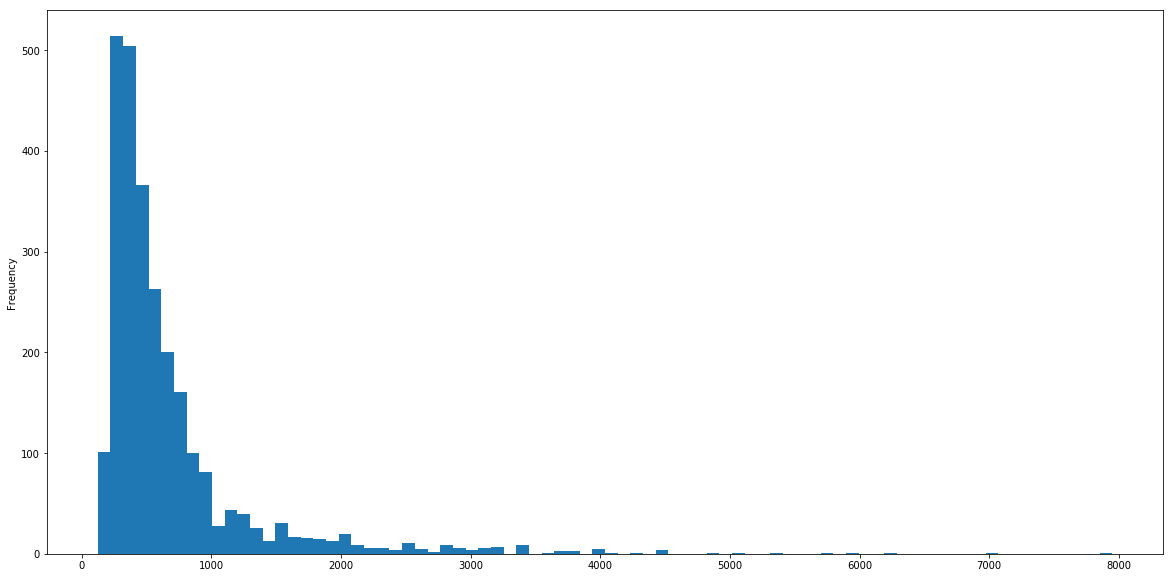

In [178]:
plt.figure(figsize=(20,10))
df['price'].plot.hist(alpha=1, bins=80);

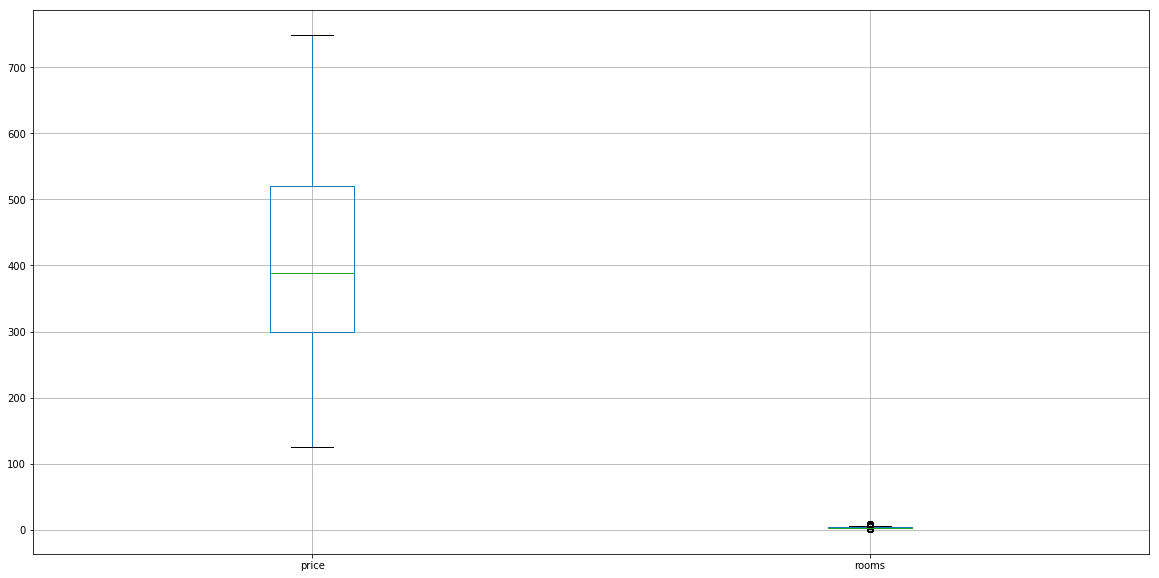

In [179]:
plt.figure(figsize=(20,10))
upperBound = df['price'].quantile(0.75)
df = df[df['price'] < upperBound]
df.boxplot(column=['price', 'rooms']);

In [180]:
corr = df.corr()
corr.style.background_gradient()

,living_area,price,rooms
living_area,1,0.620351,0.739148
price,0.620351,1,0.421293
rooms,0.739148,0.421293,1


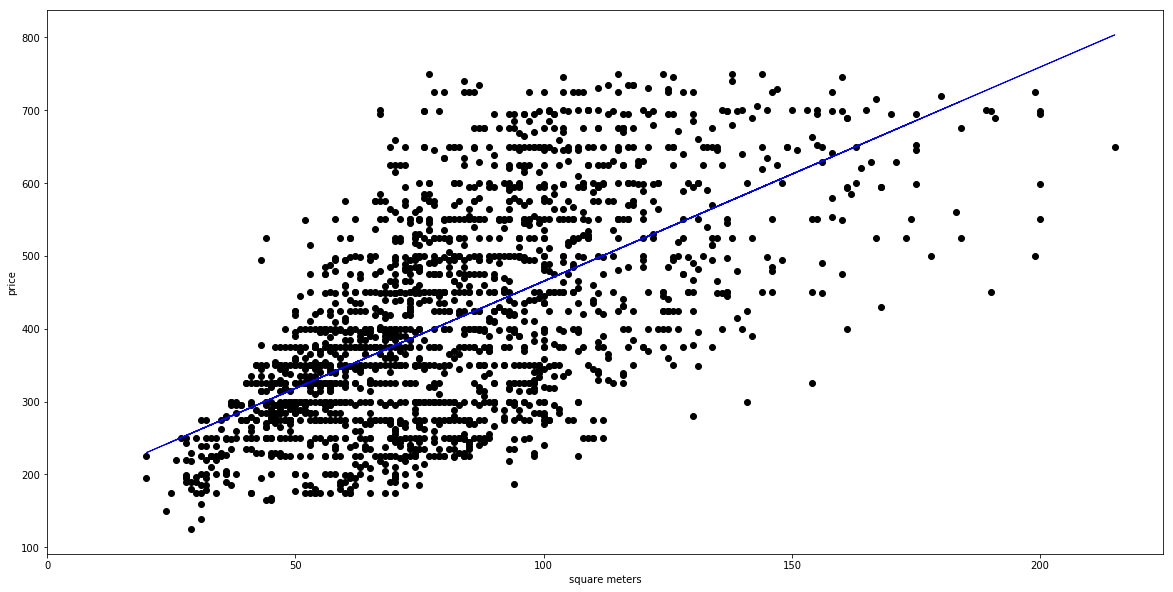

In [186]:
model = linear_model.LinearRegression()
X = df[["living_area"]]
y = df["price"]
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(20,10))
plt.scatter(X["living_area"], y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=1)

plt.xlabel("square meters")
plt.ylabel("price")
plt.xticks(np.arange(0, 250, step=50));

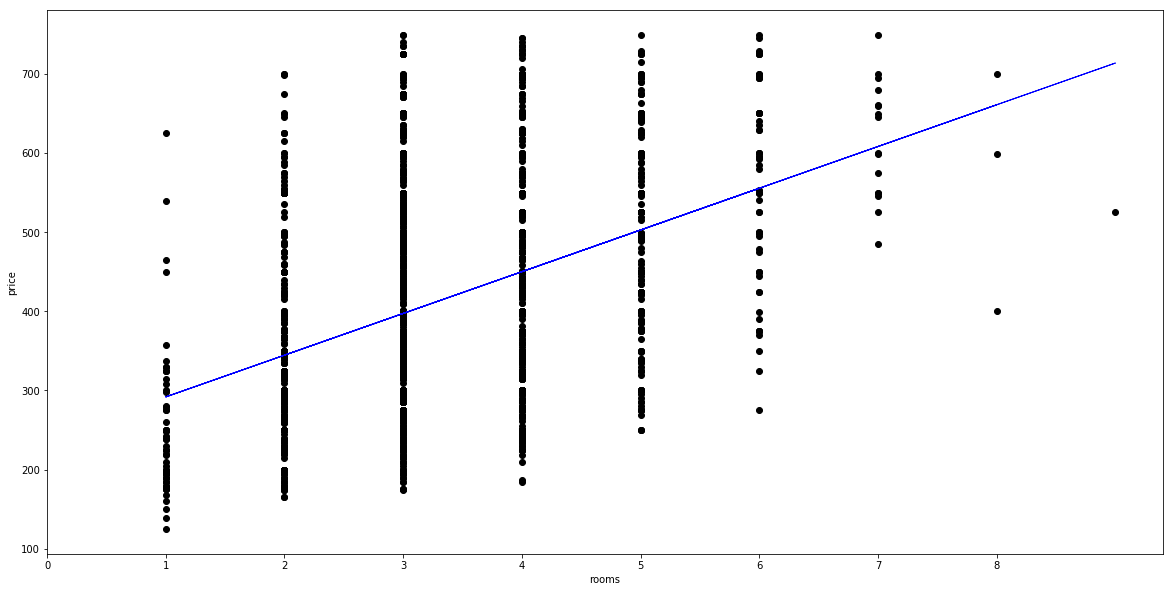

In [189]:
model = linear_model.LinearRegression()
X = df[["rooms"]]
y = df["price"]
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(20,10))
plt.scatter(X["rooms"], y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=1)

plt.xlabel("rooms")
plt.ylabel("price")
plt.xticks(np.arange(0, 9, step=1));

Total: 56


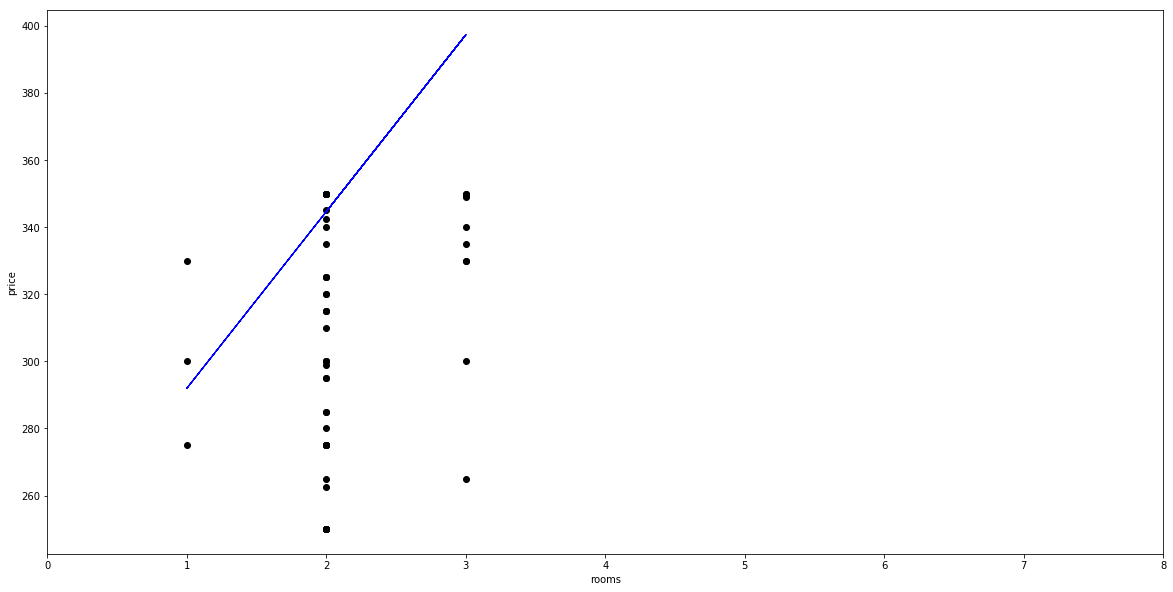

In [210]:
in_zip = [ True if re.findall("(1018|1073|1072|1074|1071|1075|1054|1016|1091)", a) else False for a in df["address"] ]
interested = df[(df["price"] >= 250) & (df["price"] <= 350) & in_zip]

X = interested[["rooms"]]
y = interested["price"]
y_pred = model.predict(X)

plt.figure(figsize=(20,10))
plt.scatter(X["rooms"], y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=1)

plt.xlabel("rooms")
plt.ylabel("price")
plt.xticks(np.arange(0, 9, step=1))

print("Total:", len(interested))

In [213]:
interested["url"].tolist()


['https://www.funda.nl/en/koop/amsterdam/appartement-40098854-eerste-jan-van-der-heijdenstraat-28-ii-v/?navigateSource=resultlist',
 'https://www.funda.nl/en/koop/amsterdam/appartement-40009218-kanaalstraat-127-ii/?navigateSource=resultlist',
 'https://www.funda.nl/en/koop/amsterdam/appartement-40008306-albert-luthulistraat-3-b/?navigateSource=resultlist',
 'https://www.funda.nl/en/koop/amsterdam/appartement-40083775-jan-lievensstraat-58-iii/?navigateSource=resultlist',
 'https://www.funda.nl/en/koop/amsterdam/appartement-40000665-zocherstraat-38-ii/?navigateSource=resultlist',
 'https://www.funda.nl/en/koop/amsterdam/appartement-40099653-dusartstraat-33-ii/?navigateSource=resultlist',
 'https://www.funda.nl/en/koop/amsterdam/appartement-40083521-conradstraat-116-i/?navigateSource=resultlist',
 'https://www.funda.nl/en/koop/amsterdam/appartement-40099194-jan-bernardusstraat-20-ii-r/?navigateSource=resultlist',
 'https://www.funda.nl/en/koop/amsterdam/appartement-40077408-derde-wittenbu

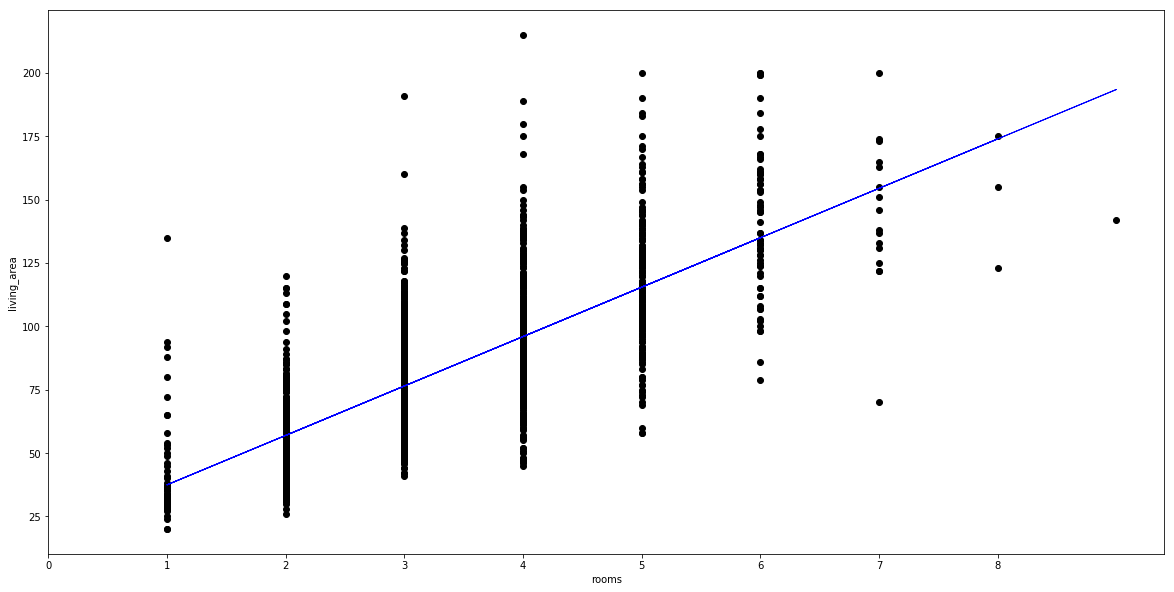

In [214]:
model = linear_model.LinearRegression()
X = df[["rooms"]]
y = df["living_area"]
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(20,10))
plt.scatter(X["rooms"], y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=1)

plt.xlabel("rooms")
plt.ylabel("living_area")
plt.xticks(np.arange(0, 9, step=1));